In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## 한글 사용을 위한 페키지##
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.width', 1000)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
dict_1 = {
    'item_id': [1, 1, 2, 2, 2, 2, 3, 4],
    'company': ['A', 'A', 'B', 'B', 'B', 'C', 'A', 'C'],
    'item_name': ['apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'grape', 'watermelon'],
    'price': [15000, 15000, 4750, 4750, 4750, 4200, 13000, 18000],
    'color': ['red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'purple', 'green']
}

df_1 = pd.DataFrame(dict_1)
print(df_1)

   item_id company   item_name  price   color
0        1       A       apple  15000     red
1        1       A       apple  15000     red
2        2       B      banana   4750  yellow
3        2       B      banana   4750  yellow
4        2       B      banana   4750  yellow
5        2       C      banana   4200  yellow
6        3       A       grape  13000  purple
7        4       C  watermelon  18000   green


In [3]:
duplicated_bool = df_1.duplicated()
print(duplicated_bool)

df_1.drop_duplicates(inplace=True)

print(df_1)

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool
   item_id company   item_name  price   color
0        1       A       apple  15000     red
2        2       B      banana   4750  yellow
5        2       C      banana   4200  yellow
6        3       A       grape  13000  purple
7        4       C  watermelon  18000   green


In [4]:
print(df_1.loc[6])
print()
print(df_1.iloc[3])

item_id           3
company           A
item_name     grape
price         13000
color        purple
Name: 6, dtype: object

item_id           3
company           A
item_name     grape
price         13000
color        purple
Name: 6, dtype: object


In [5]:
#drop 없이는 예전 index를 포함한 열이 추가된다
print(df_1)
print()
df_1.reset_index(inplace = True, drop = True)
print(df_1)

   item_id company   item_name  price   color
0        1       A       apple  15000     red
2        2       B      banana   4750  yellow
5        2       C      banana   4200  yellow
6        3       A       grape  13000  purple
7        4       C  watermelon  18000   green

   item_id company   item_name  price   color
0        1       A       apple  15000     red
1        2       B      banana   4750  yellow
2        2       C      banana   4200  yellow
3        3       A       grape  13000  purple
4        4       C  watermelon  18000   green


In [6]:
dict_1 = {
    'col1': [1, 2, 3, np.nan, np.nan],
    'col2': [10, 20, np.nan, 40, 50],
    'col3': [np.nan, 200, 300, 400, np.nan]
}

df_1 = pd.DataFrame(dict_1)
print(df_1)
print()
print(pd.isna(df_1))
#print(pd.isnull(df_1))


   col1  col2   col3
0   1.0  10.0    NaN
1   2.0  20.0  200.0
2   3.0   NaN  300.0
3   NaN  40.0  400.0
4   NaN  50.0    NaN

    col1   col2   col3
0  False  False   True
1  False  False  False
2  False   True  False
3   True  False  False
4   True  False   True


In [7]:
print(pd.isna(df_1).sum())
print(pd.isna(df_1).sum().sum())
print()

print(df_1.count())
print(df_1.count().sum())
print()

print(df_1.shape)
print(df_1.shape[0] * df_1.shape[1])

col1    2
col2    1
col3    2
dtype: int64
5

col1    3
col2    4
col3    3
dtype: int64
10

(5, 3)
15


In [8]:
df_2 = df_1.copy()
print(df_2)
print()

df_2.dropna(inplace=True)
print(df_2)
print()

df_2 = df_1.copy()
df_2.fillna(0, inplace=True)
print(df_2)

   col1  col2   col3
0   1.0  10.0    NaN
1   2.0  20.0  200.0
2   3.0   NaN  300.0
3   NaN  40.0  400.0
4   NaN  50.0    NaN

   col1  col2   col3
1   2.0  20.0  200.0

   col1  col2   col3
0   1.0  10.0    0.0
1   2.0  20.0  200.0
2   3.0   0.0  300.0
3   0.0  40.0  400.0
4   0.0  50.0    0.0


In [9]:
df_2 = df_1.copy()
print(df_2.mean())
print()

df_2.fillna(df_2.mean(), inplace=True)
print(df_2)

col1      2.0
col2     30.0
col3    300.0
dtype: float64

   col1  col2   col3
0   1.0  10.0  300.0
1   2.0  20.0  200.0
2   3.0  30.0  300.0
3   2.0  40.0  400.0
4   2.0  50.0  300.0


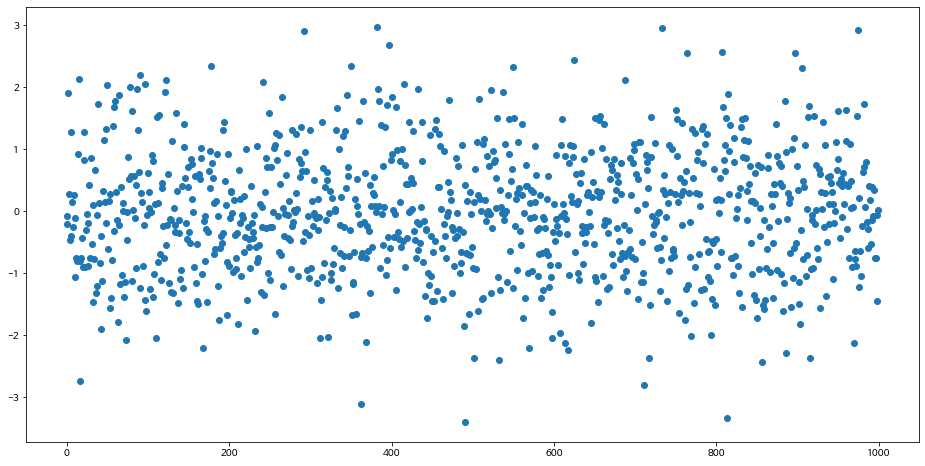

In [10]:
data = np.random.randn(1000)
plt.figure(figsize=(16,8))
plt.plot(data, 'o')
plt.show()

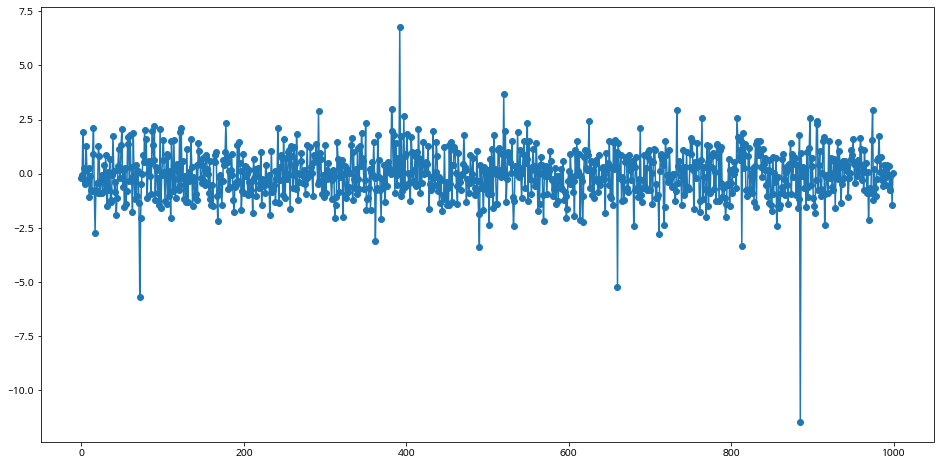

In [11]:
ol_data = pd.Series(data.copy())
ol_num = 10
for i in range(ol_num):
  rand_id = np.random.randint(0, len(data))
  ol_data[rand_id] = ol_data[rand_id] * 5
plt.figure(figsize=(16,8))
plt.plot(ol_data, 'o-')
plt.show()

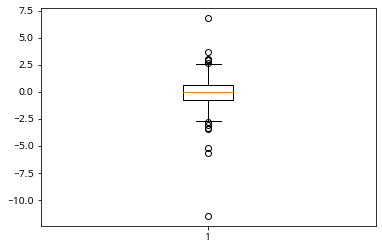

In [12]:
plt.boxplot(ol_data)
plt.show()

In [13]:
#Q1 = np.percentile(ol_data, 25)
#Q3 = np.percentile(ol_data, 75)
Q1 = ol_data.quantile(0.25)
Q3 = ol_data.quantile(0.75)

IQR = Q3 - Q1

print("Q1: ", Q1, "Q3: ", Q3, "IQR: ", IQR)
idx1 = ol_data[ol_data > (Q3 + 1.5 * IQR)].index
idx2 = ol_data[ol_data < (Q1 - 1.5 * IQR)].index
print(ol_data[idx1].count())
print(ol_data[idx2].count())

Q1:  -0.7306353478572224 Q3:  0.6221696689841043 IQR:  1.3528050168413266
7
7


In [14]:
ol_data[idx1]

292    2.902095
382    2.976938
392    6.788450
397    2.679225
520    3.679928
733    2.954507
974    2.923313
dtype: float64

In [15]:
ol_data[idx2]

72     -5.689998
362    -3.116939
490    -3.404906
660    -5.236464
711    -2.799238
813    -3.338421
885   -11.477802
dtype: float64

In [16]:
ol_data.drop(idx1, inplace=True)
ol_data.drop(idx2, inplace=True)
print(ol_data.count())

986


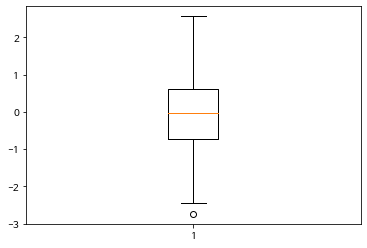

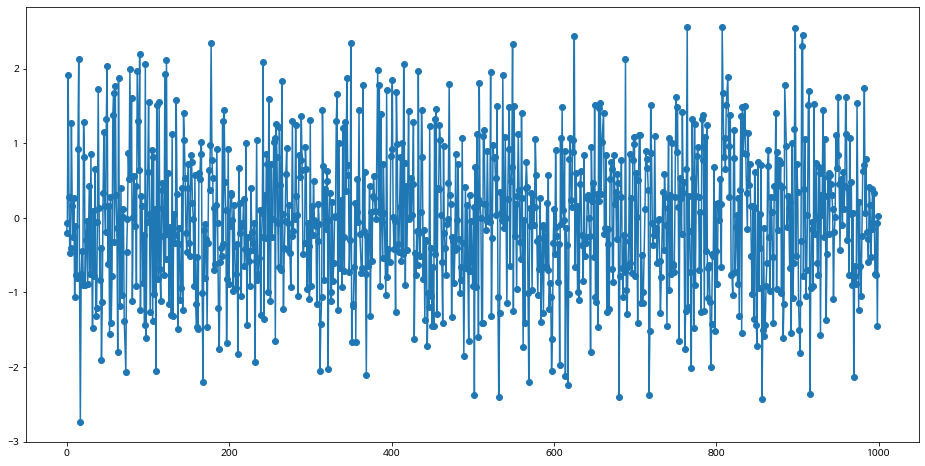

In [17]:
plt.boxplot(ol_data)
plt.figure(figsize=(16,8))
plt.plot(ol_data, 'o-')
plt.show()

In [18]:
names = ['춘향', '몽룡', '향단', '방자']
math = [90, 85, 100, 95]
df = pd.DataFrame({'이름':names, '수학':math})
print(df)

   이름   수학
0  춘향   90
1  몽룡   85
2  향단  100
3  방자   95


In [19]:
def process(x):
  if x >= 90:
    return 'A'
  elif x >= 80:
    return 'B'
  else:
    return 'C'

tmp = df.copy()

tmp['수학'] = tmp['수학'].apply(process)
print(tmp)

   이름 수학
0  춘향  A
1  몽룡  B
2  향단  A
3  방자  A


In [20]:
df['학점'] = df['수학'].apply(process)
print(df)

   이름   수학 학점
0  춘향   90  A
1  몽룡   85  B
2  향단  100  A
3  방자   95  A


In [21]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
0           0       3    male  22.0      1      0   7.2500        S   Third    man        True  NaN  Southampton    no  False
1           1       1  female  38.0      1      0  71.2833        C   First  woman       False    C    Cherbourg   yes  False
2           1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   yes   True
3           1       1  female  35.0      1      0  53.1000        S   First  woman       False    C  Southampton   yes  False
4           0       3    male  35.0      0      0   8.0500        S   Third    man        True  NaN  Southampton    no   True
..        ...     ...     ...   ...    ...    ...      ...      ...     ...    ...         ...  ...          ...   ...    ...
886         0       2    male  27.0      0      0  13.0000        S  Second    man        True  NaN  Southampton    no

In [22]:
#동일한 메모리 주소
view = titanic
print(id(view), id(titanic))

#데이터 복사로 서로 다른 메모리 주소소
data = titanic.copy()
print(id(data), id(titanic))

print(data.count())

139938384669776 139938384669776
139938384585104 139938384669776
survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64


In [23]:
dup = data.duplicated()
print(dup.sum())

data.drop_duplicates(inplace=True)
print(data.count())
print()
print(titanic.count())

107
survived       784
pclass         784
sex            784
age            678
sibsp          784
parch          784
fare           784
embarked       782
class          784
who            784
adult_male     784
deck           202
embark_town    782
alive          784
alone          784
dtype: int64

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64


In [24]:
pd.set_option('mode.chained_assignment', 'warn')
data2 = data[['survived', 'sex', 'fare', 'age']]
print(data2.count())
print()

print(data2.isna().sum())
print()

data2.dropna(inplace=True)
print(data2.count())

survived    784
sex         784
fare        784
age         678
dtype: int64

survived      0
sex           0
fare          0
age         106
dtype: int64

survived    678
sex         678
fare        678
age         678
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


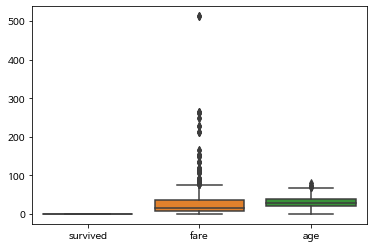

In [25]:
sns.boxplot(data=data2)
plt.show()

In [26]:
ser = data2['fare']
Q1 = ser.quantile(0.25)
Q3 = ser.quantile(0.75)
print(Q1, Q3)
print()

IQR = Q3-Q1
idx = ser[ser > (Q3 + 1.5 * IQR)].index
print(ser[idx].sort_values(ascending=False))

8.05 35.28855

679    512.3292
737    512.3292
258    512.3292
27     263.0000
438    263.0000
         ...   
102     77.2875
681     76.7292
52      76.7292
645     76.7292
218     76.2917
Name: fare, Length: 88, dtype: float64


In [27]:
print(data2['survived'].value_counts())
print()
print(data2['sex'].value_counts())

0    394
1    284
Name: survived, dtype: int64

male      422
female    256
Name: sex, dtype: int64


In [28]:
def encoding(x):
  if x == 'male':
    return 0
  else:
    return 1

data2['sex_code'] = data2['sex'].apply(encoding)
print(data2['sex'].value_counts())
print()
print(data2['sex_code'].value_counts())

male      422
female    256
Name: sex, dtype: int64

0    422
1    256
Name: sex_code, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [29]:
print(titanic)
print()

data2.reset_index(drop=True, inplace=True)

print(data2)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
0           0       3    male  22.0      1      0   7.2500        S   Third    man        True  NaN  Southampton    no  False
1           1       1  female  38.0      1      0  71.2833        C   First  woman       False    C    Cherbourg   yes  False
2           1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   yes   True
3           1       1  female  35.0      1      0  53.1000        S   First  woman       False    C  Southampton   yes  False
4           0       3    male  35.0      0      0   8.0500        S   Third    man        True  NaN  Southampton    no   True
..        ...     ...     ...   ...    ...    ...      ...      ...     ...    ...         ...  ...          ...   ...    ...
886         0       2    male  27.0      0      0  13.0000        S  Second    man        True  NaN  Southampton    no